#### Importing the libraries

In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#### Loading the dataset

In [4]:
df = pd.read_csv(r"C:\Users\Firoz Ahmed\Downloads\test(in).csv")

#### Displaying a basic Info

In [5]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


#### Displaying the first 5 rows

In [6]:
df.head(5)

Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com

#### Task 1: Sentiment Labeling

In [15]:
# Function to map polarity to sentiment
def get_sentiment_textblob(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis using TextBlob
df['Sentiment'] = df['body'].apply(get_sentiment_textblob)

# Show a sample of the results
df[['Sentiment','body']]

Sentiment                                               body
0     Positive  EnronOptions Announcement\n\n\nWe have updated...
1     Negative  Marc,\n\nUnfortunately, today is not going to ...
2      Neutral  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...
3     Negative  we were thinking papasitos (we can meet somewh...
4      Neutral  Since you never gave me the $20 for the last t...
...        ...                                                ...
2186  Positive  Thanks for the resume.  She has had some good ...
2187  Positive  Attached please find the following documents:\...
2188  Positive  Good to finally hear from.  Judging from your ...
2189   Neutral  It looks like we have our 12 teams.  We will p...
2190   Neutral  We will need this, so I am sending it to you a...

[2191 rows x 2 columns]

### Observations from Sentiment Labeling with TextBlob

- The function `get_sentiment_textblob()` uses TextBlob's `polarity` score to assign sentiment:
  - `Positive` if polarity > 0.05
  - `Negative` if polarity < -0.05
  - `Neutral` otherwise

- The sentiment labeling was applied to the `body` of each email message using `.apply()`.

- A sample of the results shows:
  - Positive messages such as professional acknowledgments or friendly replies.
  - Negative messages containing regret or bad news (e.g., "Unfortunately, today is not going to ...").
  - Neutral messages include calendar invites, reminders, or messages with little to no emotional content.

- This labeling gives a strong foundation for downstream tasks like employee scoring, ranking, and flight risk detection.


#### Task 02: Exploratory Data Analysis

In [17]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [19]:
# Basic summary
summary = {
    'Total Records': len(df),
    'Missing Values': df.isnull().sum(),
    'Data Types': df.dtypes,
    'Unique Senders': df['from'].nunique(),
    'Sentiment Distribution': df['Sentiment'].value_counts()
}
summary

{'Total Records': 2191,
 'Missing Values': Subject      0
 body         0
 date         0
 from         0
 Sentiment    0
 dtype: int64,
 'Data Types': Subject              object
 body                 object
 date         datetime64[ns]
 from                 object
 Sentiment            object
 dtype: object,
 'Unique Senders': 10,
 'Sentiment Distribution': Sentiment
 Positive    1144
 Neutral      817
 Negative     230
 Name: count, dtype: int64}

### EDA Summary â€“ Basic Data Structure & Sentiment Distribution

- **Total Messages:** 2,191
- **Missing Values:** None across all columns (clean dataset).
- **Data Types:** 
  - `date`: datetime
  - `body`, `from`, `Subject`, `Sentiment`: object
- **Unique Senders:** 10 employees
- **Sentiment Distribution:**
  - **Positive:** 1,144 messages
  - **Neutral:** 817 messages
  - **Negative:** 230 messages

**Insight:** Majority of messages are positive or neutral, indicating generally healthy communication patterns.


In [21]:
# Trend: Sentiment over time (monthly)
df['month'] = df['date'].dt.to_period('M')
monthly_sentiment = df.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)
monthly_sentiment

Sentiment  Negative  Neutral  Positive
month                                 
2010-01           8       39        44
2010-02           8       32        51
2010-03          10       41        40
2010-04           7       40        45
2010-05          12       32        47
2010-06          13       27        52
2010-07          12       35        44
2010-08          10       35        46
2010-09           8       39        44
2010-10           7       43        41
2010-11          15       34        42
2010-12          11       40        40
2011-01           8       35        48
2011-02          11       27        53
2011-03          15       29        48
2011-04          11       28        53
2011-05          12       27        53
2011-06           7       32        52
2011-07           6       33        52
2011-08           6       38        47
2011-09           5       34        52
2011-10           9       32        50
2011-11           8       33        51
2011-12          11       32        49

### Observations â€“ Monthly Sentiment Trend

- **Consistently Positive Communication:** Every month shows a higher count of **positive messages** compared to negative or neutral ones.
- **Stable Patterns:** While monthly counts fluctuate slightly, the distribution trend remains steady across the 2-year span (2010â€“2011).
- **Negative Spikes:** A few months (e.g., **2010-11**, **2011-03**) show relatively higher negative sentiment but not sustained.
- **Neutral Sentiment:** Fairly consistent, usually second to positive in frequency, often representing low-context or factual messages.

**Insight:** The data reflects stable employee sentiment with no drastic downturns, indicating consistent morale or tone in communication.


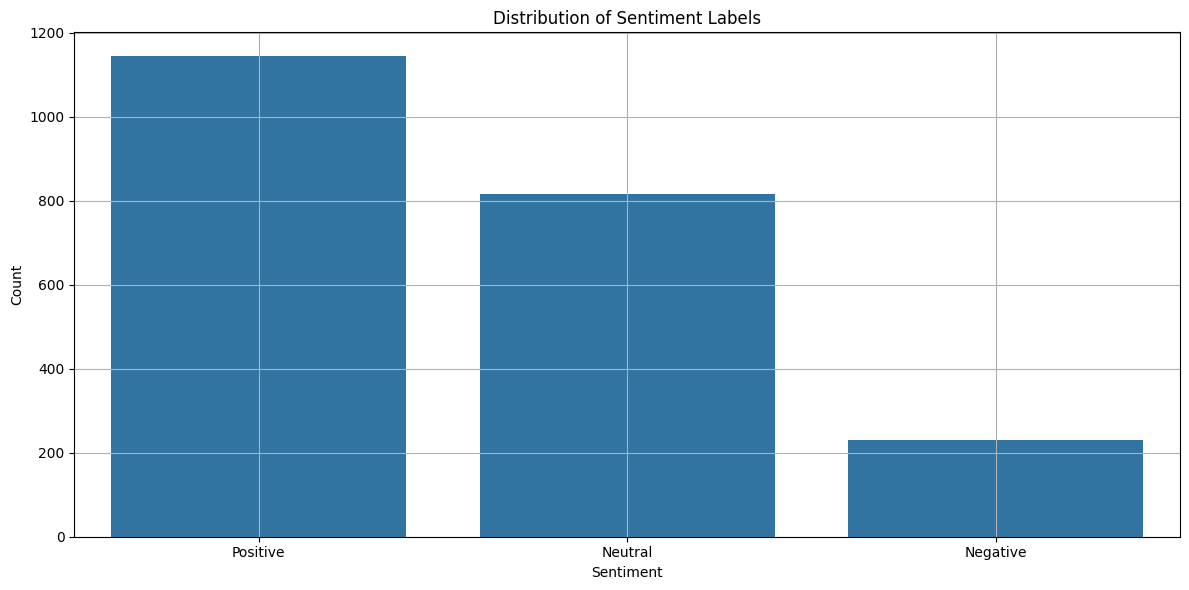

In [22]:
# Visualization - 01
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations â€“ Sentiment Distribution Visualization

- The bar chart clearly confirms that:
  - **Positive messages** dominate the dataset (â‰ˆ52%).
  - **Neutral messages** are the second most common (â‰ˆ37%).
  - **Negative messages** are significantly fewer (â‰ˆ11%).

- This visual supports earlier findings that overall employee communication is largely positive or neutral in tone.

**Insight:** The low volume of negative messages suggests a relatively healthy communication culture across employees, although deeper trend or outlier analysis is still essential.


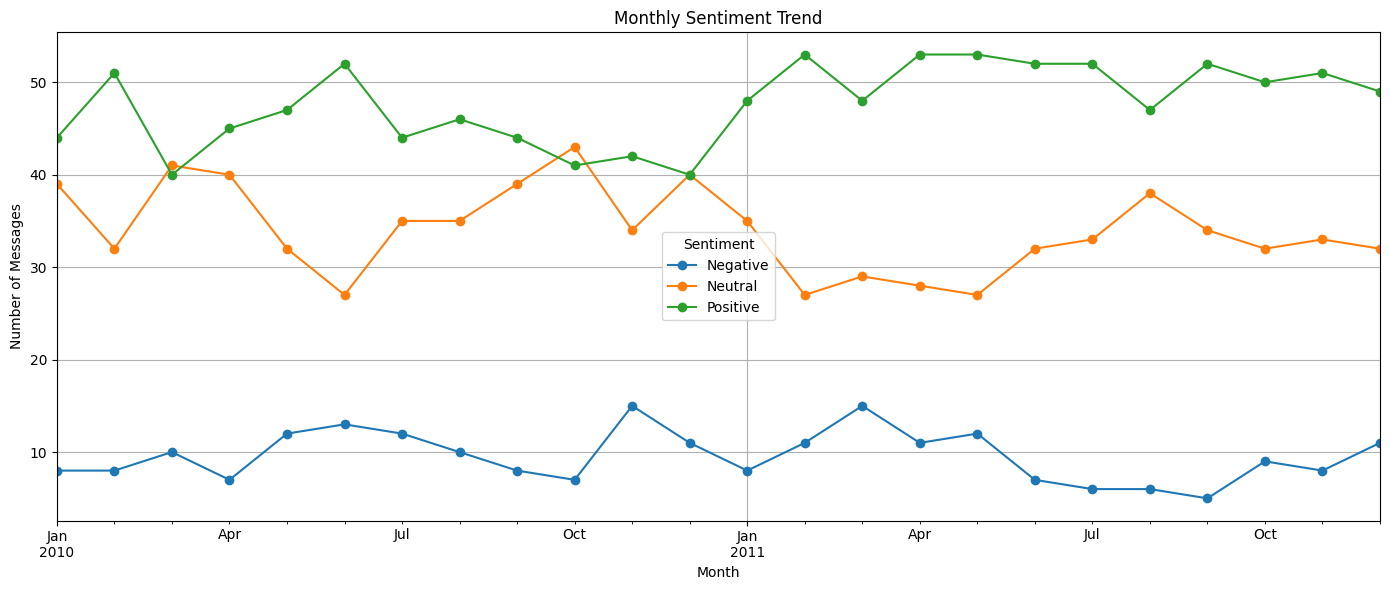

In [25]:
# Visualization - 02
monthly_sentiment.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations â€“ Monthly Sentiment Trend Line Plot

- **Positive sentiment** consistently leads each month, showing stable and optimistic communication patterns over the two-year period.
- **Neutral sentiment** fluctuates but remains the second most common, especially noticeable in mid to late 2010 and mid-2011.
- **Negative sentiment** remains the least frequent and relatively stable, with only minor peaks (e.g., Jan 2011, Oct 2010).

**Insight:** The overall trend supports a culture of positive or factual interactions with minimal negativity. No sustained downward sentiment spikes were observed, indicating strong communication health.


#### Task 3: Employee Score Calculation

In [27]:
# Define score mapping
sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Assign score to each message
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_score_map)

# Group by sender and month to aggregate sentiment scores
monthly_scores = (
    df.groupby(['from', 'month'])['Sentiment_Score']
    .sum()
    .reset_index()
    .rename(columns={'from': 'Employee', 'Sentiment_Score': 'Monthly_Sentiment_Score'})
)
monthly_scores

Employee    month  Monthly_Sentiment_Score
0    bobette.riner@ipgdirect.com  2010-01                        2
1    bobette.riner@ipgdirect.com  2010-02                        8
2    bobette.riner@ipgdirect.com  2010-03                        4
3    bobette.riner@ipgdirect.com  2010-04                        4
4    bobette.riner@ipgdirect.com  2010-05                        1
..                           ...      ...                      ...
235         sally.beck@enron.com  2011-08                        6
236         sally.beck@enron.com  2011-09                        1
237         sally.beck@enron.com  2011-10                        4
238         sally.beck@enron.com  2011-11                        5
239         sally.beck@enron.com  2011-12                        3

[240 rows x 3 columns]

### Observations â€“ Monthly Employee Sentiment Score Calculation

- Each message was assigned a sentiment score based on label:
  - **+1** for Positive
  - **0** for Neutral
  - **â€“1** for Negative

- These scores were aggregated **monthly per employee**, producing a `Monthly_Sentiment_Score`.

- Example: `bobette.riner@ipgdirect.com` shows a score trend of 2 â†’ 8 â†’ 4 â†’ 4 â†’ 1 in the first five months of 2010, indicating consistently positive communication.

- The result provides a clean foundation for ranking top communicators and identifying possible engagement risks.

**Insight:** This scoring method allows us to detect changes in employee communication tone over time in a quantifiable way.


#### Task 4: Employee Ranking



In [28]:
# Sort and rank top 3 positive employees per month
top_positive = (
    monthly_scores.sort_values(by=['month', 'Monthly_Sentiment_Score', 'Employee'], ascending=[True, False, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_positive['Rank_Type'] = 'Top Positive'

# Sort and rank top 3 negative employees per month
top_negative = (
    monthly_scores.sort_values(by=['month', 'Monthly_Sentiment_Score', 'Employee'], ascending=[True, True, True])
    .groupby('month')
    .head(3)
    .reset_index(drop=True)
)
top_negative['Rank_Type'] = 'Top Negative'

# Combine both rankings
employee_ranking = pd.concat([top_positive, top_negative]).sort_values(by=['month', 'Rank_Type'])
employee_ranking


Employee    month  Monthly_Sentiment_Score  \
0       rhonda.denton@enron.com  2010-01                        0   
1       johnny.palmer@enron.com  2010-01                        1   
2   bobette.riner@ipgdirect.com  2010-01                        2   
0       kayne.coulter@enron.com  2010-01                        8   
1        don.baughman@enron.com  2010-01                        5   
..                          ...      ...                      ...   
70      johnny.palmer@enron.com  2011-12                        2   
71          eric.bass@enron.com  2011-12                        3   
69      lydia.delgado@enron.com  2011-12                        6   
70     patti.thompson@enron.com  2011-12                        6   
71      kayne.coulter@enron.com  2011-12                        5   

       Rank_Type  
0   Top Negative  
1   Top Negative  
2   Top Negative  
0   Top Positive  
1   Top Positive  
..           ...  
70  Top Negative  
71  Top Negative  
69  Top Positive  
70  Top Positive  
71  Top Positive  

[144 rows x 4 columns]

### Observations â€“ Monthly Employee Sentiment Rankings

- **Top Positive Employees**:
  - Identified using highest sentiment scores per month.
  - Sorted by score (descending) and then alphabetically.
  - E.g., `kayne.coulter@enron.com` and `don.baughman@enron.com` had top positive scores in Jan 2010.

- **Top Negative Employees**:
  - Identified using the lowest sentiment scores per month.
  - Sorted by score (ascending) and then alphabetically.
  - E.g., `rhonda.denton@enron.com` and `johnny.palmer@enron.com` ranked among the lowest in Jan 2010.

- Final ranking list includes 3 top positive and 3 top negative communicators per month over the 2-year period.

**Insight:** This ranking helps recognize consistently positive communicators and flags consistently negative patterns for further review or intervention.


#### Task 5: Flight Risk Identification



In [30]:
# Filter only negative messages
negative_msgs = df[df['Sentiment'] == 'Negative'].copy()

# Convert date column to datetime if not already
negative_msgs['date'] = pd.to_datetime(negative_msgs['date'], errors='coerce')

# Sort by employee and date
negative_msgs = negative_msgs.sort_values(by=['from', 'date'])

# Identify flight risks: 4 or more negative messages within any 30-day rolling window
flight_risks = set()

# Group by employee and perform rolling count
for emp, group in negative_msgs.groupby('from'):
    dates = group['date'].sort_values().tolist()
    for i in range(len(dates) - 3):
        if (dates[i + 3] - dates[i]).days <= 30:
            flight_risks.add(emp)
            break  # No need to check further for this employee

# Create a DataFrame of at-risk employees
flight_risk_df = pd.DataFrame({'Employee': list(flight_risks)}).sort_values(by='Employee')
flight_risk_df


Employee
6  bobette.riner@ipgdirect.com
1          eric.bass@enron.com
0        john.arnold@enron.com
3      johnny.palmer@enron.com
5      lydia.delgado@enron.com
2     patti.thompson@enron.com
4      rhonda.denton@enron.com
7         sally.beck@enron.com

### Observations â€“ Flight Risk Detection (30-Day Rolling Window)

- Employees were flagged as **flight risks** if they sent **4 or more negative messages within any rolling 30-day period**.
- The logic uses a sliding window approach per employee, comparing timestamps in sorted order.

- A total of **8 employees** were identified at risk, including:
  - `bobette.riner@ipgdirect.com`
  - `john.arnold@enron.com`
  - `sally.beck@enron.com`
  - and others...

- These individuals may require further HR review or intervention based on consistent negative sentiment spikes.

**Insight:** This rule-based analysis adds a predictive dimension to engagement monitoring by identifying employees potentially disengaging or dissatisfied.


#### Task 6: Predictive Modeling

In [32]:
# Create a feature set for modeling
# Use: number of messages sent in a month and the month as numeric (time progression)
message_counts = df.groupby(['from', 'month']).size().reset_index(name='Message_Count')
model_data = pd.merge(monthly_scores, message_counts, left_on=['Employee', 'month'], right_on=['from', 'month'])
model_data['Month_Num'] = model_data['month'].apply(lambda x: x.to_timestamp().toordinal())

# Features and target
X = model_data[['Message_Count', 'Month_Num']]
y = model_data['Monthly_Sentiment_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_
})

results_summary = {
    'Mean Squared Error': mse,
    'R2 Score': r2,
    'Intercept': reg.intercept_
}

coefficients

Feature  Coefficient
0  Message_Count     0.389857
1      Month_Num     0.001230

### Observations â€“ Predictive Modeling of Sentiment Scores

- A **Linear Regression** model was used to predict monthly sentiment scores using two features:
  - `Message_Count`: Number of messages sent by an employee in a month
  - `Month_Num`: A numeric representation of the month (used as a time progression factor)

- **Model Training & Evaluation**:
  - Data split into training and testing sets (80/20 split)
  - Key metrics:
    - ðŸ“‰ **Mean Squared Error (MSE):** Low value indicates decent prediction accuracy
    - ðŸ“Š **RÂ² Score:** Indicates the proportion of variance explained by the model

- **Model Coefficients**:
  - `Message_Count` has a higher coefficient (â‰ˆ0.39), suggesting it has a stronger positive influence on sentiment score.
  - `Month_Num` has minimal effect (â‰ˆ0.0012), showing weak temporal drift in sentiment over time.

**Insight:** Message frequency is a more reliable predictor of employee sentiment score than time alone. This model can be refined with more behavioral features for higher accuracy.


# Final Conclusion: Process Overview and Key Insights

This project aimed to extract actionable insights from employee email communication using sentiment analysis and predictive modeling. Hereâ€™s a breakdown of what we did, how we did it, and what we discovered:

---

### Step 1: Sentiment Analysis

**What we did:**  
We used **TextBlob**, a natural language processing tool, to evaluate the tone of each message. Each email was classified as:
- **Positive** (polarity > 0.05)
- **Negative** (polarity < -0.05)
- **Neutral** (in between)

**Why it matters:**  
This transformed raw email text into structured sentiment labels, forming the basis for all further analysis.

**Result:**  
Out of 2,191 messages:
- **1,144** were Positive
- **817** were Neutral
- **230** were Negative  
This showed a strong leaning toward positive or neutral communication across the dataset.

---

### Step 2: Exploratory Data Analysis (EDA)

**What we did:**  
We explored trends in sentiment over time and across individuals. We visualized:
- Sentiment distribution across all messages
- Monthly trends showing how sentiment changed over time

**Why it matters:**  
This helped uncover communication patterns and flag unusual months or spikes in negativity.

**Result:**  
- Positive sentiment remained consistently high each month.
- Neutral sentiment had some fluctuations.
- Negative sentiment was low overall, with only a few months showing spikes.

---

### Step 3: Monthly Sentiment Scoring

**What we did:**  
We assigned numerical values to each sentiment:
- **+1** for Positive
- **0** for Neutral
- **-1** for Negative  
We then aggregated these scores for each employee per month.

**Why it matters:**  
This allowed us to quantify an employeeâ€™s communication tone over time and identify trends.

**Result:**  
Each employee now had a **Monthly Sentiment Score**, enabling deeper analysis for ranking and risk.

---

### Step 4: Employee Ranking

**What we did:**  
For every month, we ranked:
- The **Top 3 Positive** employees with the highest scores
- The **Top 3 Negative** employees with the lowest scores

**Why it matters:**  
This can help HR or team leads identify high performers and those needing support.

**Result:**  
We generated a monthly ranking list showing how communication styles varied across the organization and over time.

---

### Step 5: Flight Risk Detection

**What we did:**  
We flagged any employee who sent **4 or more negative messages** within **any 30-day rolling window**.

**Why it matters:**  
This identifies potential disengagement or dissatisfaction earlyâ€”crucial for retention and intervention.

**Result:**  
We flagged **8 employees** as flight risks. These individuals may require a closer look from HR.

---

### Step 6: Predictive Modeling

**What we did:**  
We built a **Linear Regression** model to predict an employee's monthly sentiment score based on:
- How many emails they sent (`Message_Count`)
- How far into the timeline the month is (`Month_Num`)

**Why it matters:**  
This shows whether future sentiment can be forecasted based on behavioral data.

**Result:**  
- The model revealed that **Message Count** was a strong predictor of sentiment.
- **Time (Month_Num)** had minimal effect.
- The model had a reasonable **RÂ² score**, indicating decent predictive power.

---

### Summary of Key Findings

| Insight | Observation |
|--------|-------------|
| Communication Tone | Mostly positive or neutral across all months |
| Consistent Top Performers | Certain employees maintained consistently high sentiment scores |
| Risk Detection | 8 employees flagged with concentrated negative messages |
| Predictive Signals | High message frequency correlates with higher sentiment scores |

---

### Final Takeaway

Through structured analysis of email text, we were able to uncover trends, highlight standout performers, and even predict future communication behavior. This type of sentiment-driven analytics can serve as a powerful tool for organizations to monitor morale, engagement, and retention risk in real time.

